## **Python Image Processing: Numpy/Matplotlib Crashcourse**



NumPy is a fundamental package for scientific computing and data science in Python. It is of concern to us in computer vision because we will be discretizing images as NumPy arrays. 

In [5]:
# Recall python lists 
my_list = [1,2,3] 
my_list 

[1, 2, 3]

In [7]:
# Recall, you can make 2D lists in python...
matrix = [ [1, 2, 3], 
           [4, 5, 6], 
           [7, 8, 9] ] 

# The above 2d list is essentially the same as... 
other_matrix = [ [1,2,3], [4,5,6], [7,8,9] ] 

print(matrix)
print(other_matrix)

# The purpose of representing it as 'matrix' in the 2d format, is so that we can visualize images like this...

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


### Converting the matrices defined above into numpy arrays numpy arrays are similar to python lists, but have much greater functionality --> They are widely used in libraries such as OpenCV (the reason we are learning them) and Pandas, which consequently is used in deep learning API's like keras and tensorflow 2.0. 

In [8]:
import numpy as np 
# convention to import the numpy library as 'np' for easy accessing 
# similarly you would type 'import tensorflow as tf', or 'import pandas as pd'
# If you get an error because you did not install numpy yet, go to your command terminal and type 
# pip install numpy 

In [9]:
numpy_matrix = np.array(matrix) 
numpy_matrix 

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [11]:
# Notice that if we do: 
numpy_matrix = np.array(other_matrix) 
numpy_matrix

# We get the same output from jupyter 
# This is because the numpy arrays are simply...ARRAYS...they are not meant to be lists. 
# The primary use of NumPy in image processing is to simply represent images in arrays, 
# as it makes much more sense to a 2D matrix/array rather than nested python lists as shown above. 

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

## Some useful numpy functions: 

In [12]:
# Creating 1D array, useful for making graphs, like when you need to define discrete 'x' values to pass 
# to a function...

np.arange(0,10) 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
# third parameter can define step size 
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [14]:
np.arange(0,10,0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [17]:
x = np.arange(0,10,0.005)

In [20]:
# x is an object of type Numpy nd.array, and will have member variable properties, 
# like normal class objects would 

# x.shape tells us the y,x, n-levels of informatoin available 
x.shape

(2000,)

In [21]:
type(x) 

numpy.ndarray

## Some matplotlib :) 

In [23]:
y = np.sin(x) 

In [24]:
y

array([ 0.        ,  0.00499998,  0.00999983, ..., -0.53137431,
       -0.53560333, -0.53981897])

In [25]:
y.shape

(2000,)

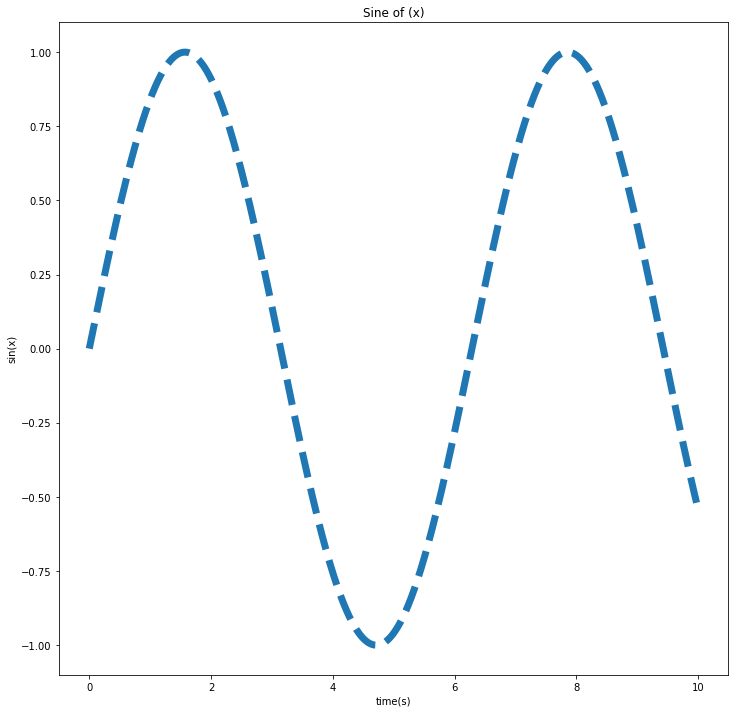

In [30]:
# Now, plot the function
from matplotlib import pyplot as plt 


plt.figure(figsize=(12,12)) 
plt.title('Sine of (x)')
plt.xlabel('time(s)') 
plt.ylabel('sin(x)')
plt.plot(x, y, linestyle='dashed', linewidth=7) 

## Multiple Plots (matplotlib subplot function) 


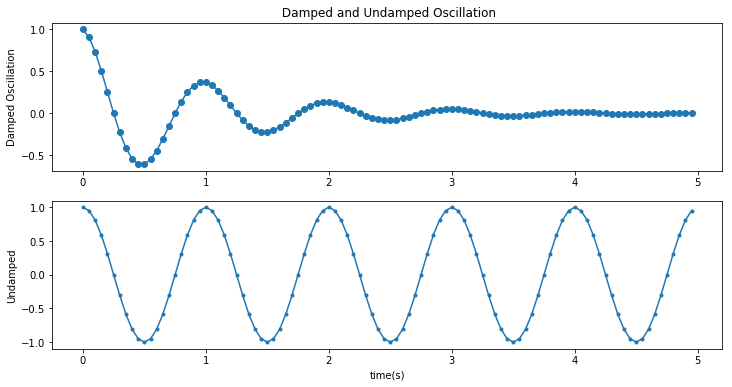

In [37]:
# THIS CELL IS ANOTHER WAY OF DOING A SUBPLOT...
# we won't be using this during the tutorial to keep things to consistent. 

# x1 = np.arange(0, 5, 0.05) 
# x2 = np.arange(0, 5, 0.05) 

# y1 = np.cos(2 * np.pi * x1)*np.exp(-x1)
# y2 = np.cos(2 * np.pi * x2)

# # Plot is kinda small, so we wanna change the figure size 
# plt.figure(figsize=(12, 6)) 

# plt.subplot(2, 1, 1)
# plt.title(" Damped and Undamped Oscillation") 
# plt.ylabel("Damped Oscillation") 
# plt.plot(x1, y1, 'o-')

# plt.subplot(2, 1, 2) 
# plt.xlabel("time(s)") 
# plt.ylabel("Undamped") 
# plt.plot(x2, y2, '.-')

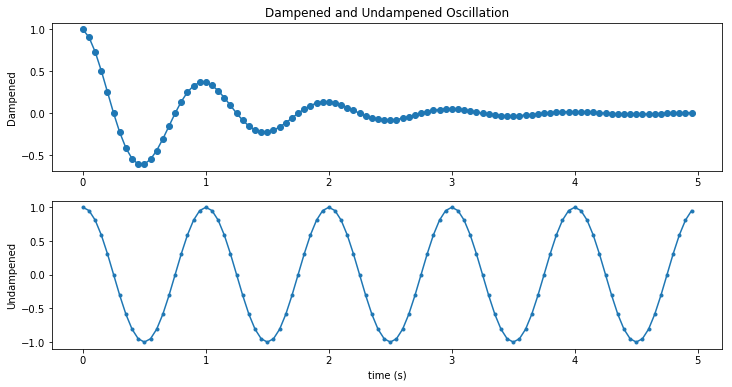

In [13]:
import numpy as np

x1 = np.arange(0, 5, 0.05) 
x2 = np.arange(0, 5, 0.05) 

y1 = np.cos(2 * np.pi * x1)*np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6)) 

ax[0].set_title("Dampened and Undampened Oscillation") 
ax[0].set_ylabel("Dampened") 
ax[0].plot(x1, y1, "o-") 

ax[1].set_ylabel("Undampened") 
ax[1].set_xlabel("time (s)")
ax[1].plot(x2, y2, ".-")

# Questions about Numpy and Matplotlib? 

### We are next going to move on to using numpy to represent images as arrays. We will be covering...

#### - **Loading images**
#### - **doing basic operations on images like indexing and slicing** 
#### - **as well as plotting for easy comparison** 

In [2]:
# Use basic function written using a library built into python 3 called tkinter to load images 
# If you're interested in how the code actually works, look up the documentation for tkinter's 
# TK and askopenfilename documentation. 
import tkinter 
from tkinter.filedialog import askopenfilename 

def loadFileDir(description=None): 
    root = tkinter.Tk() 
    if description == None:
        root.filename = askopenfilename(parent=root, title="Choose folder to assign path:") 
    else: 
        root.filename = askopenfilename(parent=root, title="Choose " + description + " path:") 
    root.destroy() 
    return root.filename 

In [3]:
# This function call just saves the string path of the image 
src_directory = loadFileDir("Select the lena image") 
src_directory

'C:/Users/Irena/Desktop/CMS/media/Lena example.png'

In [10]:
# Now to actually use opencbv 
import cv2 

# "src" is convention for "source" or "image source"
src_colour = cv2.imread(src_directory) 
src_colour

array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 60,  18,  84],
        [ 60,  18,  84],
        [ 58,  27,  92],
        ...,
        [ 84,  73, 173],
        [ 76,  68, 172],
        [ 79,  62, 177]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]]

In [7]:
# Read the image in grayscale 
src_gray = cv2.imread(src_directory, 0)  
src_gray 

array([[169, 169, 168, ..., 175, 162, 138],
       [169, 169, 168, ..., 175, 162, 138],
       [169, 169, 168, ..., 175, 162, 138],
       ...,
       [ 53,  53,  59, ..., 115, 112, 114],
       [ 53,  53,  64, ..., 117, 118, 122],
       [ 53,  53,  64, ..., 117, 118, 122]], dtype=uint8)

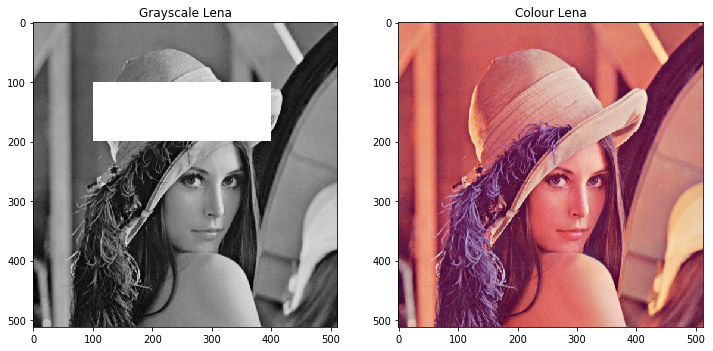

In [24]:
# Plot the two images using matplotlib subplot function we showed earlier 
from matplotlib import pyplot as plt 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 

ax[0].set_title("Grayscale Lena") 
ax[0].imshow(src_gray, "gray") 

ax[1].set_title("Colour Lena") 

# OpenCV will read colour images as BGR, where matplotlib does RGB 
bgr = cv2.cvtColor(src_colour, cv2.COLOR_BGR2RGB)
ax[1].imshow(bgr)

# the colour is off... use cv2.COLOR_BGR2RGB


# Image Indexing --> To get a feel for image dimensions  

In [23]:
# Let's show y and x level indexing 
# In the numpy array, (0,0) represents the top left corner (as you can see) 

# let's draw a white line in the lena image 
src_gray[100:200, 100:400] = 255

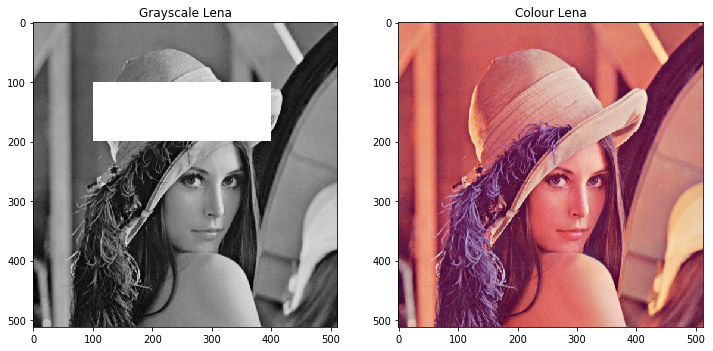

In [25]:
# Plot the two images using matplotlib subplot function we showed earlier 
from matplotlib import pyplot as plt 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 

ax[0].set_title("Grayscale Lena") 
ax[0].imshow(src_gray, "gray") 

ax[1].set_title("Colour Lena") 

# OpenCV will read colour images as BGR, where matplotlib does RGB 
bgr = cv2.cvtColor(src_colour, cv2.COLOR_BGR2RGB)
ax[1].imshow(bgr)

# the colour is off... use cv2.COLOR_BGR2RGB